In [26]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    accuracy_score, 
    cohen_kappa_score,
    f1_score
)

In [20]:
data = pd.read_csv('Datathon_1_Dataset_2.csv')
data.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23535 entries, 0 to 23534
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  23535 non-null  int64  
 1   Gender               23535 non-null  object 
 2   Calorie_Intake       23535 non-null  int64  
 3   Sugar_Intake         23535 non-null  int64  
 4   Physical_Activity    23535 non-null  int64  
 5   Fast_Food_Frequency  23535 non-null  int64  
 6   Screen_Time          23535 non-null  int64  
 7   Height               23535 non-null  float64
 8   Weight               23535 non-null  float64
 9   BMI                  23535 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 1.8+ MB


In [22]:
data.describe()

,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
count,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000
mean,48.532993,2495.845634,64.824559,89.496707,2.018441,5.486127,1.650279,70.019142,26.127641
std,17.872736,577.798752,32.004657,52.120810,1.414634,3.454036,0.119714,15.016866,6.875510
min,18.000000,1500.000000,10.000000,0.000000,0.000000,0.000000,1.196086,10.010016,3.442184
25%,33.000000,1991.000000,37.000000,45.000000,1.000000,2.000000,1.569815,59.859242,21.337576
50%,48.000000,2495.000000,65.000000,90.000000,2.000000,6.000000,1.650122,70.022501,25.661507
75%,64.000000,2994.000000,93.000000,135.000000,3.000000,8.000000,1.731470,80.038009,30.329032
max,79.000000,3499.000000,119.000000,179.000000,4.000000,11.000000,2.154243,126.493504,70.475419


In [23]:
# detect Nan values
data.isnull().sum()

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64

In [29]:
bins = [0, 18.5, 25, 30, 100] 
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']
data['BMI_Group'] = pd.cut(data['BMI'], bins=bins, labels=labels, right=False)
y = data['BMI_Group']

/var/folders/bd/b7mzp7ls5gs414z9k17vbkpw0000gn/T/ipykernel_63290/2158115740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


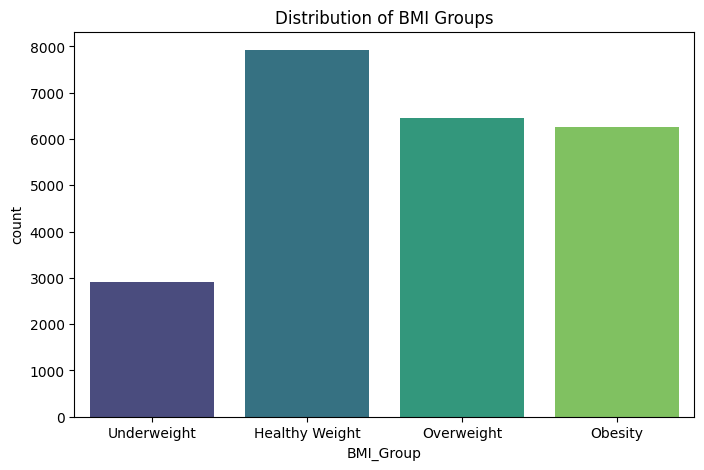

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of BMI Groups')
plt.show()

In [31]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

X = data[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time']]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
param_grid = {'n_neighbors': np.arange(1, 10)}
knn_base = KNeighborsClassifier()

K = 1, Accuracy = 0.2768
K = 2, Accuracy = 0.3078
K = 3, Accuracy = 0.3030
K = 4, Accuracy = 0.2840
K = 5, Accuracy = 0.2868
K = 6, Accuracy = 0.2913
K = 7, Accuracy = 0.2962
K = 8, Accuracy = 0.2925
K = 9, Accuracy = 0.2955
K = 10, Accuracy = 0.2947
K = 11, Accuracy = 0.2953
K = 12, Accuracy = 0.2925
K = 13, Accuracy = 0.2908
K = 14, Accuracy = 0.2985
K = 15, Accuracy = 0.2925
K = 16, Accuracy = 0.2985
K = 17, Accuracy = 0.3013
K = 18, Accuracy = 0.2983
K = 19, Accuracy = 0.3017
K = 20, Accuracy = 0.3057
The highest accuracy of 0.3078 was achieved with K = 2


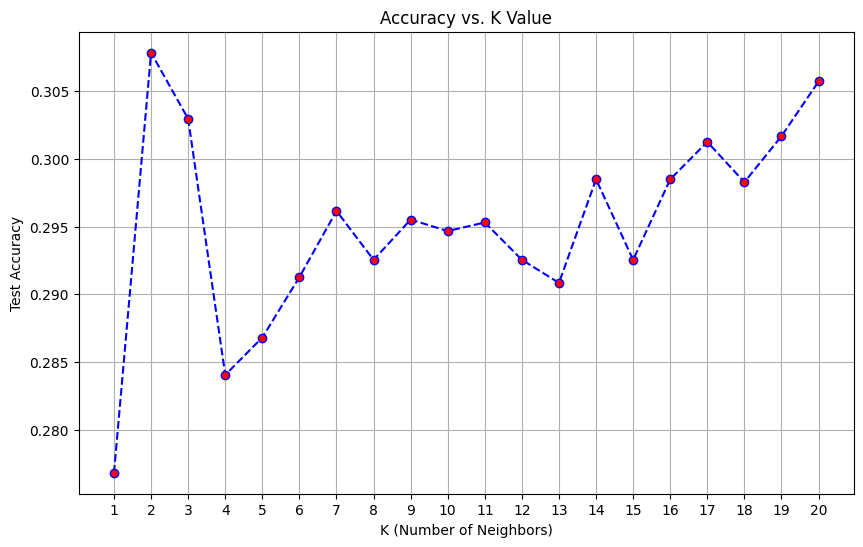

In [51]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_temp = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracy_scores.append(acc)
    print(f"K = {k}, Accuracy = {acc:.4f}")

best_acc = max(accuracy_scores)
best_k = k_values[accuracy_scores.index(best_acc)]

print(f"The highest accuracy of {best_acc:.4f} was achieved with K = {best_k}")


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue', markerfacecolor='red')
plt.title('Accuracy vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [52]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

y_pred = knn_final.predict(X_test)

In [53]:
print("\n--- PERFORMANCE SUMMARY ---")
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Cohen’s Kappa: {cohen_kappa_score(y_test, y_pred):.4f}")
print(f"Macro F1-Score: {f1_score(y_test, y_pred, average='macro'):.4f}")

print("\n--- DETAILED CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))


--- PERFORMANCE SUMMARY ---
Overall Accuracy: 0.3078
Cohen’s Kappa: 0.0070
Macro F1-Score: 0.2289

--- DETAILED CLASSIFICATION REPORT ---
                precision    recall  f1-score   support

Healthy Weight       0.34      0.59      0.43      1562
       Obesity       0.26      0.28      0.27      1244
    Overweight       0.29      0.14      0.19      1288
   Underweight       0.17      0.02      0.03       613

      accuracy                           0.31      4707
     macro avg       0.26      0.25      0.23      4707
  weighted avg       0.28      0.31      0.27      4707



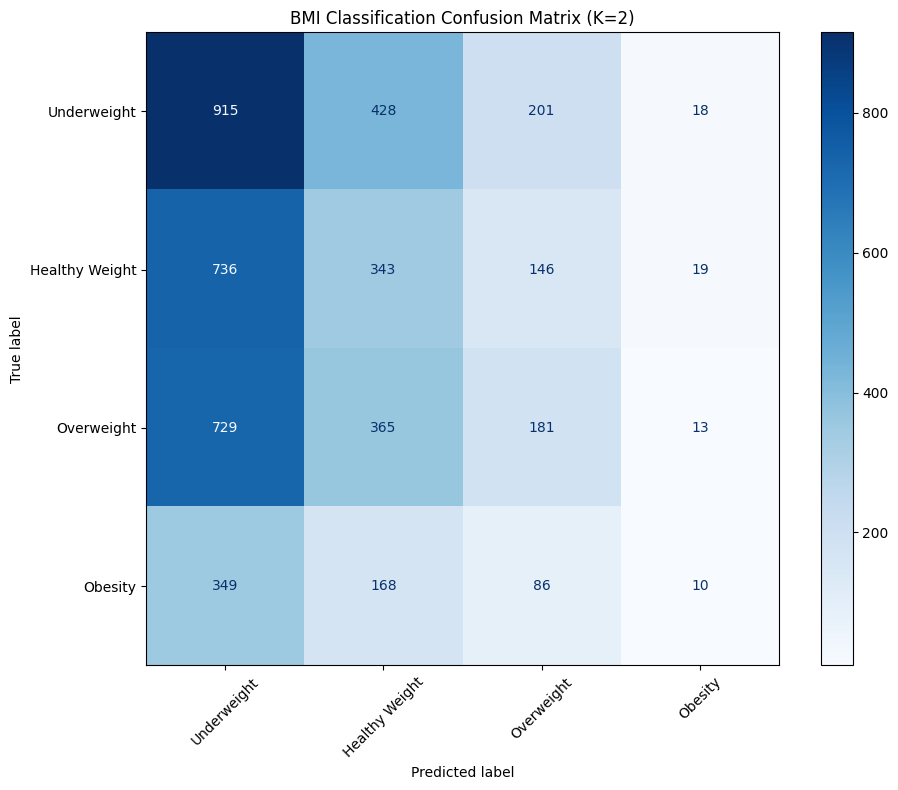

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    knn_final, 
    X_test, 
    y_test, 
    display_labels=labels, 
    cmap='Blues', 
    xticks_rotation=45,
    ax=ax
)
plt.title(f'BMI Classification Confusion Matrix (K={best_k})')
plt.tight_layout()
plt.show()